In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy
from tqdm import tqdm
tqdm.pandas()
import gensim

In [2]:
df = pd.read_csv('train.csv')

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [4]:
def keep_token(t):
    return (t.is_alpha and 
            not (t.is_space or t.is_punct or 
                 t.is_stop or t.like_num))

def lemmatize_doc(doc):
    return [ t.lemma_ for t in doc if keep_token(t)]

# docs = [lemmatize_doc(nlp(doc)) for doc in news_train.data]

In [5]:
df['tokens'] = df.question_text.progress_apply(lambda x: nlp.tokenizer(x))

 17%|█▋        | 226739/1306122 [01:25<09:03, 1987.48it/s]

KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
df['lemma'] = df.tokens.progress_apply(lambda x: lemmatize_doc(x))

In [7]:
df.head()

,qid,question_text,target,tokens,lemma
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"(How, did, Quebec, nationalists, see, their, p...","[Quebec, nationalist, province, nation]"
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"(Do, you, have, an, adopted, dog, ,, how, woul...","[adopt, dog, encourage, people, adopt, shop]"
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"(Why, does, velocity, affect, time, ?, Does, v...","[velocity, affect, time, velocity, affect, spa..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"(How, did, Otto, von, Guericke, used, the, Mag...","[Otto, von, Guericke, Magdeburg, hemisphere]"
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"(Can, I, convert, montra, helicon, D, to, a, m...","[convert, montra, helicon, D, mountain, bike, ..."


In [8]:
# df.to_pickle('spacy_frame.pkl')

In [9]:
from gensim.models import Phrases

In [10]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full

docs_dict = Dictionary(df.lemma)
docs_dict.filter_extremes(no_below=10000, no_above=0.2)
docs_dict.compactify()

In [11]:
docs_corpus = [docs_dict.doc2bow(doc) for doc in df.lemma]

In [ ]:
#LDAAAAAA
from gensim.models import LdaMulticore

In [ ]:
troll_df = df[df.target==1]

In [ ]:
troll_df.head()

In [21]:
troll_dict = Dictionary(troll_df.lemma)
troll_dict.filter_extremes(no_below=20, no_above=0.2)
troll_dict.compactify()
troll_corpus = [troll_dict.doc2bow(doc) for doc in troll_df.lemma]

In [28]:
ldamodel = LdaMulticore(troll_corpus, id2word=troll_dict, num_topics=3)

In [29]:
ldamodel.show_topics()

[(0,
  '0.025*"Muslim" + 0.021*"woman" + 0.021*"Trump" + 0.014*"man" + 0.012*"Indian" + 0.012*"people" + 0.010*"country" + 0.009*"India" + 0.009*"Quora" + 0.008*"like"'),
 (1,
  '0.030*"people" + 0.014*"sex" + 0.010*"like" + 0.010*"girl" + 0.008*"old" + 0.008*"Quora" + 0.007*"know" + 0.007*"want" + 0.007*"think" + 0.006*"year"'),
 (2,
  '0.027*"people" + 0.016*"American" + 0.013*"like" + 0.013*"woman" + 0.013*"Indian" + 0.012*"white" + 0.011*"liberal" + 0.010*"black" + 0.008*"think" + 0.008*"man"')]

In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [31]:
troll_lda = pyLDAvis.gensim.prepare(ldamodel, troll_corpus, troll_dict)

/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
troll_lda

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.097739  0.062202       1        1  35.904057
2      0.018258 -0.099026       2        1  35.541241
1     -0.115997  0.036824       3        1  28.554708, topic_info=     Category          Freq      Term         Total  loglift  logprob
137   Default   5410.000000    Muslim   5410.000000  30.0000  30.0000
146   Default   2562.000000       sex   2562.000000  29.0000  29.0000
37    Default   6950.000000     woman   6950.000000  28.0000  28.0000
100   Default  12672.000000    people  12672.000000  27.0000  27.0000
464   Default   1531.000000       old   1531.000000  26.0000  26.0000
92    Default   6233.000000     Trump   6233.000000  25.0000  25.0000
86    Default   2581.000000   liberal   2581.000000  24.0000  24.0000
294   Default   1609.000000     Hindu   1609.000000  23.0000  23.0000
463   Default   1477.000000    Donald   1477.000000  22.0000  22.0000
1161  Default   1320.000000    racist   1320.000000  21.0000  21.0000
61    Default   1661.000000       Jew   1661.000000  20.0000  20.0000
34    Default   4766.000000  American   4766.000000  19.0000  19.0000
103   Default   3215.000000   country   3215.000000  18.0000  18.0000
139   Default   1066.000000    answer   1066.000000  17.0000  17.0000
645   Default    658.000000    mother    658.000000  16.0000  16.0000
376   Default    656.000000    sister    656.000000  15.0000  15.0000
182   Default   2079.000000  question   2079.000000  14.0000  14.0000
19    Default    843.000000       boy    843.000000  13.0000  13.0000
138   Default   3377.000000     Quora   3377.000000  12.0000  12.0000
468   Default    786.000000      help    786.000000  11.0000  11.0000
11    Default   3018.000000     black   3018.000000  10.0000  10.0000
636   Default   1018.000000      Modi   1018.000000   9.0000   9.0000
168   Default   2088.000000   Chinese   2088.000000   8.0000   8.0000
379   Default    875.000000   Russian    875.000000   7.0000   7.0000
364   Default   3686.000000     white   3686.000000   6.0000   6.0000
446   Default   1042.000000     Islam   1042.000000   5.0000   5.0000
462   Default   1246.000000      rape   1246.000000   4.0000   4.0000
331   Default    886.000000       eat    886.000000   3.0000   3.0000
1777  Default    549.000000       BJP    549.000000   2.0000   2.0000
145   Default    562.000000       mom    562.000000   1.0000   1.0000
...       ...           ...       ...           ...      ...      ...
689    Topic3    334.502380     write    383.734985   1.1160  -6.1790
836    Topic3    462.141479  daughter    548.005615   1.0829  -5.8558
331    Topic3    710.435181       eat    886.676453   1.0317  -5.4258
636    Topic3    778.247925      Modi   1018.775513   0.9840  -5.3346
1707   Topic3    249.580368      read    289.318115   1.1056  -6.4719
246    Topic3    586.153809      have    784.462646   0.9619  -5.6181
28     Topic3    468.094360     penis    611.279785   0.9865  -5.8430
880    Topic3    718.868713     human   1030.389282   0.8933  -5.4140
45     Topic3   1046.491821      year   1682.157227   0.7787  -5.0385
75     Topic3    311.110565  language    379.003845   1.0560  -6.2515
39     Topic3    671.738525  European    992.642456   0.8628  -5.4818
100    Topic3   4829.089355    people  12672.672852   0.2886  -3.5093
23     Topic3   1167.195801      know   2127.397217   0.6531  -4.9293
109    Topic3    675.570679       use   1028.673584   0.8329  -5.4761
316    Topic3    658.325806    person    995.668457   0.8396  -5.5020
179    Topic3   1539.472168      girl   3484.144043   0.4366  -4.6525
116    Topic3    826.053345      time   1452.370605   0.6891  -5.2750
182    Topic3   1025.589600  question   2079.690430   0.5464  -5.0587
138    Topic3   1295.308472     Quora   3377.007324   0.2951  -4.8252
173    Topic3    607.608948       big    966.291809   0.7894  -5.5821
253    Topic3   1657.387207      like   5948.58

In [33]:
pyLDAvis.save_html(troll_lda, 'lda_troll.html')

In [12]:
#I only did it for the gram 
bigram = gensim.models.Phrases(df.lemma)

In [13]:
df['bi_lemma'] = df.lemma.progress_apply(lambda x: bigram[x])

100%|██████████| 1306122/1306122 [00:59<00:00, 22034.38it/s]


In [14]:
trigram = gensim.models.Phrases(df.bi_lemma)
df['tri_lemma'] = df.bi_lemma.progress_apply(lambda x: trigram[x])

100%|██████████| 1306122/1306122 [00:58<00:00, 22268.64it/s]


In [16]:
df['tri_join'] = df.tri_lemma.progress_apply(lambda x: (' ').join(x))

100%|██████████| 1306122/1306122 [00:02<00:00, 556826.37it/s]


In [18]:
docs_dict = Dictionary(df.tri_lemma)
docs_dict.filter_extremes(no_below=20, no_above=0.2)
docs_dict.compactify()

In [19]:
docs_corpus = [docs_dict.doc2bow(doc) for doc in df.tri_lemma]
model_tfidf = TfidfModel(docs_corpus, id2word=docs_dict)
docs_tfidf  = model_tfidf[docs_corpus]

In [29]:
docs_corpus[2]

[(9, 2), (10, 1), (11, 1), (12, 1), (13, 2)]

In [30]:
model_tfidf[docs_corpus[2]]

[(9, 0.4892913548188031),
 (10, 0.3906631664627054),
 (11, 0.27532949502709814),
 (12, 0.17698352758170321),
 (13, 0.707705278065504)]

In [25]:
df.tri_lemma[0]

['Quebec', 'nationalist', 'province', 'nation']

In [26]:
docs_dict[0]

'Quebec'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
df['tri_join'] = df.tri_lemma.progress_apply(lambda x: (' ').join(x))

100%|██████████| 1306122/1306122 [00:02<00:00, 528362.86it/s]


In [ ]:
# df_vectors = pd.DataFrame()
# df_vectors['arrays']= df.tri_lemma.progress_apply(lambda x: sum(nlp.tokenizer(i).vector for i in x)) 

In [ ]:
# df_vectors.to_pickle('vectors.pkl')

In [47]:
from sklearn.model_selection import train_test_split

X = df.tri_join
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.tri_join)

In [51]:
vectors_df = pd.DataFrame(X)

In [49]:
vectors_df.head
\

<bound method NDFrame.head of                                                   tri_join
0                       Quebec nationalist province nation
1                    adopt dog encourage people adopt shop
2        velocity affect time velocity affect space geo...
3                   Otto_von Guericke Magdeburg hemisphere
4        convert montra helicon D mountain_bike change ...
5        Gaza slowly Auschwitz Dachau Treblinka Palesti...
6        Quora automatically ban conservative opinion r...
7                            crazy wash wipe grocery Germs
8          thing dress moderately different dress_modestly
9        phase ignorant people love completely disregar...
10                                                feminism
11                                    Calgary Flames found
12              dumb possibly true explanation Trump_elect
13            use external_hard_disk OS datum datum affect
14       live home boyfriend love boyfriend home progre...
15                        

In [36]:
dense = tf_idf_data_train.toarray()

In [37]:
dense.shape

(979591, 176854)

In [39]:
tfidf = pd.DataFrame(dense)

In [40]:
tfidf.shape

(979591, 176854)

In [41]:
tfidf.columns = vectorizer_test.get_feature_names()

In [42]:
tf_idf_data_train.shape

(979591, 176854)

In [ ]:
tf

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
# rf_classifier = RandomForestClassifier(n_estimators=500, max_depth= 12, criterion='entropy')

In [21]:
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(X_test, nb_test_preds)


print("Multinomial Naive Bois")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")


Multinomial Naive Bois
Training Accuracy: 0.9428 		 Testing Accuracy: 0.0

----------------------------------------------------------------------



In [39]:
print(classification_report(y_test, nb_test_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    306458
           1       0.79      0.06      0.12     20073

   micro avg       0.94      0.94      0.94    326531
   macro avg       0.87      0.53      0.54    326531
weighted avg       0.93      0.94      0.92    326531



In [40]:
confusion_matrix(y_test, nb_test_preds)

array([[306121,    337],
       [ 18787,   1286]])

In [23]:
rf_classifier.fit(tf_idf_data_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

In [24]:
print(confusion_matrix(y_test, rf_test_preds))

[[306458      0]
 [ 20073      0]]


In [39]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [43]:
def plot_confusion_matrix(y_test,model_pred):
    conf_mat = confusion_matrix(y_true=y_test, y_pred=model_pred)
    #print('Confusion matrix:\n', conf_mat)

    ax= plt.subplot()
    sns.heatmap(conf_mat, ax = ax, fmt = 'g', cmap = 'Greens'); 

    # labels, title and ticks
    ax.set_xlabel('Predicted');ax.set_ylabel('Expected'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Sincere', 'TROLL AF']); ax.yaxis.set_ticklabels(['Sincere', 'TROLL AF']);
    print(classification_report(y_test,model_pred))

def plot_ROC_curve(x_test,y_test,model):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    probs = model.predict_proba(x_test)
    probs = probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,probs, pos_label= 1)
    auc = roc_auc_score(y_test, probs)
    plt.figure(figsize=(12,8))
    plt.title("ROC",fontsize = 14)
    plt.xlabel("FPR", fontsize = 12)
    plt.ylabel("TPR", fontsize = 12)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker = '.', linewidth = 4)
    plt.legend(["AUC=%.3f"%auc],loc = 'lower right',prop={'size': 30})
    plt.show()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    306458
           1       0.79      0.06      0.12     20073

   micro avg       0.94      0.94      0.94    326531
   macro avg       0.87      0.53      0.54    326531
weighted avg       0.93      0.94      0.92    326531



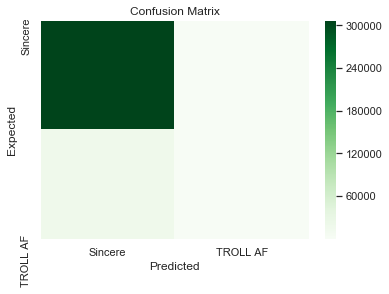

In [44]:
plot_confusion_matrix(y_test, nb_test_preds)

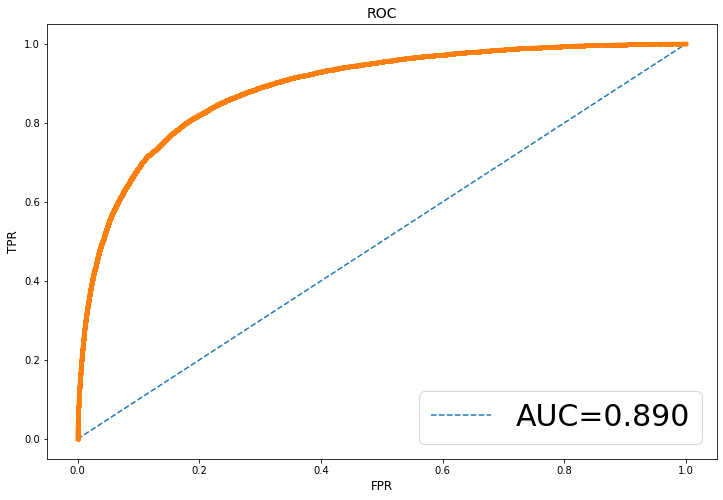

In [36]:
plot_ROC_curve(tf_idf_data_test, y_test, nb_classifier)

In [25]:
import xgboost
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=10, population_size=5,verbosity=2,config_dict='TPOT sparse')


In [ ]:
tpot.fit(tf_idf_data_train, y_train)

In [45]:
df_vectors = pd.DataFrame()
df_vectors['arrays']= df.tri_lemma.progress_apply(lambda x: [nlp.tokenizer(i).vector for i in x]) 

100%|██████████| 1306122/1306122 [39:59<00:00, 544.34it/s]  


In [49]:
X = df.tri_join
y = df.target



In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
#weighted df = np.multiply()

In [52]:
X.shape

(1306122, 200931)

In [51]:
np.multiply(X,)

<1306122x200931 sparse matrix of type '<class 'numpy.float64'>'
	with 6347975 stored elements in Compressed Sparse Row format>

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
plot_confusion_matrix(y_test, nb_test_preds)